> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Load the Dataset

In [13]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Investigate the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- Issues
    - missing values in `imdb_id`, `cast`, `homepage`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`
    - `id` should be string
    - `release_date` should be datetime

In [15]:
#Search for categorical variables
df['release_year'].value_counts().sort_values(ascending=False).head(15)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
Name: release_year, dtype: int64

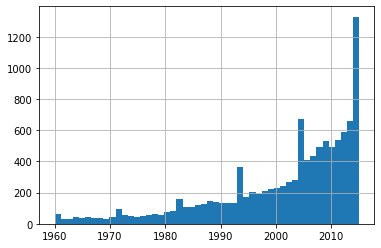

In [16]:
df['release_year'].hist(bins=50);

In [59]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Wes Craven           19
Tim Burton           19
Mike Nichols         18
David Cronenberg     18
John Carpenter       18
Name: director, dtype: int64

In [45]:
df['original_title'].value_counts().head(15)

Hamlet                  4
Annie                   3
Emma                    3
Shelter                 3
Life                    3
Wuthering Heights       3
Carrie                  3
Julia                   3
Oliver Twist            3
Alice in Wonderland     3
Jane Eyre               3
Frankenstein            3
The Black Hole          3
Beauty and the Beast    3
Hercules                3
Name: original_title, dtype: int64

It's not strange that there are many repeated titles, because famous movies are re-acted but let's check!

In [46]:
df[df['original_title'] == 'Hamlet']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


In [47]:
df[df['original_title'] == 'Carrie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4101,7342,tt0319970,0.257263,0,0,Carrie,Angela Bettis|Patricia Clarkson|Rena Sofer|Kan...,NaN,David Carson,NaN,...,Carrie White is a lonely and painfully shy tee...,132,Drama|Horror,MGM Television|Trilogy Entertainment Group,11/4/02,53,5.5,2002,0.000000e+00,0.000000e+00
5486,133805,tt1939659,1.412233,30000000,82394288,Carrie,ChloÃ« Grace Moretz|Julianne Moore|Judy Greer|...,http://www.carrie-movie.com,Kimberly Peirce,Know her name. Fear her power.,...,A reimagining of the classic horror tale about...,100,Drama|Horror,Screen Gems|Metro-Goldwyn-Mayer (MGM)|Misher F...,10/16/13,897,5.8,2013,2.808100e+07,7.712380e+07
10175,7340,tt0074285,1.263483,1800000,33800000,Carrie,Sissy Spacek|Piper Laurie|Amy Irving|William K...,NaN,Brian De Palma,If youâ€™ve got a taste for terror... take Car...,...,"Carrie may be ostracized, but the shy teen has...",98,Horror|Thriller,United Artists,11/3/76,497,6.8,1976,6.897056e+06,1.295114e+08


In [48]:
df[df['original_title'] == 'Annie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
724,196867,tt1823664,1.588010,65000000,133821816,Annie,QuvenzhanÃ© Wallis|Jamie Foxx|Rose Byrne|Camer...,NaN,Will Gluck,It's a Hard Knock Life,...,"Ever since her parents left her as a baby, lit...",119,Music|Comedy|Drama|Family,Columbia Pictures|Sony Pictures Entertainment ...,12/19/14,331,6.1,2014,5.987092e+07,1.232621e+08
2485,26177,tt0207972,0.548720,0,0,Annie,Kathy Bates|Victor Garber|Alan Cumming|Audra M...,NaN,Rob Marshall,Disney makes the classical musical more magica...,...,Eleven-year-old Annie has been living in an or...,90,Music|Family|Comedy,Walt Disney Television|Storyline Entertainment...,11/7/99,35,5.5,1999,0.000000e+00,0.000000e+00
8920,15739,tt0083564,0.421748,50000000,57059003,Annie,Aileen Quinn|Albert Finney|Carol Burnett|Ann R...,NaN,John Huston,The movie of 'Tomorrow',...,An orphan in a facility run by the mean Miss H...,127,Comedy|Drama|Family|Music,Columbia Pictures|Rastar Pictures,6/18/82,99,6.2,1982,1.129821e+08,1.289329e+08


Cool, they're not duplicates. No worries here.

In [57]:
df['homepage'].isnull().sum()

7930

In [56]:
df['homepage'].sample(10)

3301                                                   NaN
7252                                                   NaN
484                                                    NaN
10393                                                  NaN
9324                                                   NaN
3233     http://tv.disney.go.com/disneychannel/original...
1433         http://the-invention-of-lying.warnerbros.com/
5152                                                   NaN
8287                                                   NaN
1997                      http://www.gethimtothegreek.net/
Name: homepage, dtype: object

Looks like the column `homepage` won't be of much use, since it's has many nans

In [61]:
# Can't really imagine what tagline column might be like
df['tagline'].sample(10)

7279     A nightmare of terror travelling aboard the Ho...
6238                                Can't stop the signal.
8842     A Sex Pistols film - uncut, unseen, unbelievable.
8574                                  There is no defense.
10546    There's no one alive who'll play with the girl...
8539                                                   NaN
5859                                                   NaN
7636              ...and 10 easy tips to get away with it.
6750                        The Company Is Making Cutbacks
10790     Some girls will do anything to meet their idols.
Name: tagline, dtype: object

In [62]:
df['tagline'].isnull().sum()

2824

In [64]:
df['keywords'].sample(10)

9594    central and south america|predator|alien|stalk...
94          philosophy|utopia|airplane|adventure|dystopia
3717                                   butler|dublin|maid
6282            trainer|college|training|sport|basketball
8810                                             pokÃ©mon
3056                                       con man|estafa
4411            based on novel|mars|medaillon|cave|future
8154                 smoking|robber|cigarette|cigar|laden
2409    support group|dual identity|nihilism|rage and ...
5111                   suspense|thriller|independent film
Name: keywords, dtype: object

In [65]:
df['keywords'].value_counts().head(15)

woman director                     134
independent film                    82
sport                               25
musical                             24
suspense                            24
duringcreditsstinger                24
stand-up|stand up comedy            16
holiday                             16
biography                           15
independent film|woman director     13
stand up comedy                      9
based on novel                       7
found footage                        7
christmas                            7
dystopia                             7
Name: keywords, dtype: int64

In [69]:
df['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   13
In the year of 2039, after World Wars destroy much of the civilization as we know it, territories are no longer run by governments, but by corporations; the mightiest of which is the Mishima Zaibatsu. In order to placate the seething masses of this dystopia, Mishima sponsors Tekken, a tournament in which fighters battle until only one is left standing.                                              

It's strange that there are similar overviews!! This must be a mistake

In [19]:
#to get a sense of the range of popularity numbers
df['popularity'].max()

32.985763

In [20]:
df['popularity'].min()

6.500000000000001e-05

In [23]:
df[df['popularity'] == df['popularity'].min()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.0


Runtime is 561 mins which is wierd!!

In [24]:
df[df['runtime'] >= 180]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
415,340968,tt2492296,0.249595,0,0,Show Me a Hero,Oscar Isaac|Alfred Molina|Winona Ryder|Catheri...,NaN,Paul Haggis,How does a politician know he's doing the righ...,...,Mayor Nick Wasicsko took office in 1987 during...,300,History|Crime|Drama,NaN,8/16/15,32,7.7,2015,0.000000e+00,0.000000e+00
559,373977,tt4146128,0.031635,0,0,Childhood's End,Mike Vogel|Osy Ikhile|Daisy Betts|Georgina Hai...,NaN,Nick Hurran,NaN,...,"After peaceful aliens invade earth, humanity f...",246,Thriller|TV Movie|Science Fiction|Drama,NaN,12/14/15,21,6.2,2015,0.000000e+00,0.000000e+00
609,321640,tt4299972,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,NaN,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,...,"Robert Durst, scion of one of New Yorkâ€™s bil...",240,Documentary,Blumhouse Productions|Hit the Ground Running F...,2/8/15,72,8.4,2015,0.000000e+00,0.000000e+00
989,289314,tt3012698,0.369555,0,0,Olive Kitteridge,Frances McDormand|Richard Jenkins|Bill Murray|...,NaN,Lisa Cholodenko,There's no such thing as a simple life.,...,The story focuses on a middle-school math teac...,233,Drama,Home Box Office (HBO)|Playtone Productions|As ...,11/2/14,41,7.1,2014,0.000000e+00,0.000000e+00
1077,289394,tt3132738,0.342044,0,0,Houdini,Adrien Brody|Kristen Connolly|Evan Jones|Tom B...,NaN,Uli Edel,NaN,...,Follow the man behind the magic as he finds fa...,210,TV Movie|Drama|History,A&E Television Networks|Lionsgate Television,9/1/14,53,7.1,2014,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,9459,tt0066580,0.203225,0,0,Woodstock,Joe Cocker|Richie Havens|Joan Baez|Arlo Guthri...,NaN,Michael Wadleigh,"3 days of peace, music...and love.",...,An intimate look at the Woodstock Music &amp; ...,225,Documentary|Music,Wadleigh-Maurice,3/26/70,33,6.2,1970,0.000000e+00,0.000000e+00
10691,907,tt0059113,1.282053,14000000,111721910,Doctor Zhivago,Omar Sharif|Julie Christie|Geraldine Chaplin|R...,NaN,David Lean,Turbulent were the times and fiery was the lov...,...,Doctor Zhivago is the filmed adapation of the ...,197,Drama|Romance|War,Metro-Goldwyn-Mayer (MGM),12/22/65,126,6.9,1965,9.688789e+07,7.731786e+08
10716,2428,tt0059245,0.146033,20000000,12000000,The Greatest Story Ever Told,Max von Sydow|Michael Anderson Jr.|Carroll Bak...,NaN,George Stevens,NaN,...,All-star epic retelling of Christ's life.,199,Drama|History,George Stevens Productions,2/15/65,13,5.7,1965,1.384113e+08,8.304676e+07
10762,11778,tt0077416,0.959754,15000000,50000000,The Deer Hunter,Robert De Niro|John Cazale|John Savage|Christo...,NaN,Michael Cimino,One of the most important and powerful films o...,...,A group of working-class friends decides to en...,183,Drama|War,Universal Pictures|EMI Films Ltd.,12/8/78,464,7.4,1978,5.014051e+07,1.671350e+08


This means that the dataset has movies and series/miniseries which is considered a tidiness issue

In [30]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

In [31]:
#to get a sense of the range of values in the budget column
df['budget'].min()

0

In [32]:
#because it doesn't make sense to have a budget of zero
df[df['budget'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [33]:
# let's check if we can fix them by using the 2010 dollar values
df['budget_adj'].min()

0.0

In [34]:
# Nope can't fix it
df[df['budget_adj'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


They're the same rows, looks like the `budget_adj` column is calculated using the `budget` column, this is redundant so it's a useless column 

Let's check if this is the same for `revenue` and `revenue_adj` columns

In [35]:
# to get a sense of the range of values in revenue
df['revenue'].min()

0

In [37]:
# to get a sense of the range of values in revenue
df['revenue_adj'].min()

0.0

In [36]:
df[df['revenue'] == df['revenue'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [38]:
df[df['revenue_adj'] == df['revenue_adj'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


Yup, the same rows! This means that the columns `budget_adj` and `revenue_adj` are of no use

In [39]:
# to get a sense of the vote average
df['vote_average'].min()

1.5

In [40]:
df['vote_average'].max() 

9.2

This means that `vote_average` ranges from 1 to 10, a 10 star rating.

In [41]:
df.duplicated().sum()

1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!